In [1]:
!pip install scikit-image opencv-python matplotlib


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_sauvola, threshold_niblack
from google.colab import drive
import os


In [3]:
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [6]:
import zipfile
import os

zip_path = "/content/gdrive/MyDrive/dataset-3.zip"
extract_folder = "/content/fundus_data"


os.makedirs(extract_folder, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zf:
    zf.extractall(extract_folder)

print("✅ ZIP extracted successfully")


✅ ZIP extracted successfully


In [20]:
import os

folder_path = "/content/fundus_data/DRIVE/training"

for root, dirs, files in os.walk(folder_path):
    for f in files[:20]:
        print(os.path.join(root, f))


/content/fundus_data/DRIVE/training/mask/35_training_mask.gif
/content/fundus_data/DRIVE/training/mask/28_training_mask.gif
/content/fundus_data/DRIVE/training/mask/40_training_mask.gif
/content/fundus_data/DRIVE/training/mask/22_training_mask.gif
/content/fundus_data/DRIVE/training/mask/25_training_mask.gif
/content/fundus_data/DRIVE/training/mask/37_training_mask.gif
/content/fundus_data/DRIVE/training/mask/21_training_mask.gif
/content/fundus_data/DRIVE/training/mask/39_training_mask.gif
/content/fundus_data/DRIVE/training/mask/27_training_mask.gif
/content/fundus_data/DRIVE/training/mask/34_training_mask.gif
/content/fundus_data/DRIVE/training/mask/26_training_mask.gif
/content/fundus_data/DRIVE/training/mask/32_training_mask.gif
/content/fundus_data/DRIVE/training/mask/23_training_mask.gif
/content/fundus_data/DRIVE/training/mask/33_training_mask.gif
/content/fundus_data/DRIVE/training/mask/38_training_mask.gif
/content/fundus_data/DRIVE/training/mask/36_training_mask.gif
/content

In [21]:
fundus_file = "/content/fundus_data/DRIVE/training/images/21_training.tif"



(np.float64(-0.5), np.float64(564.5), np.float64(583.5), np.float64(-0.5))

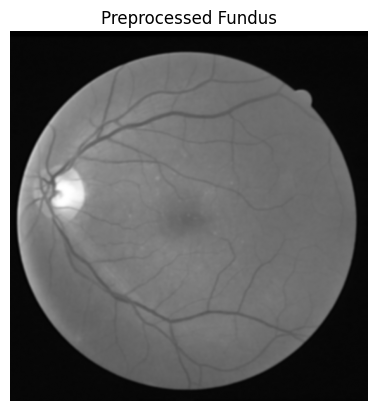

In [22]:

fundus_img = cv2.imread(fundus_file)


green_plane = fundus_img[:, :, 1]


green_plane = cv2.GaussianBlur(green_plane, (7,7), 0)

plt.imshow(green_plane, cmap='gray')
plt.title("Preprocessed Fundus")
plt.axis('off')




✔ Niblack thresholding completed


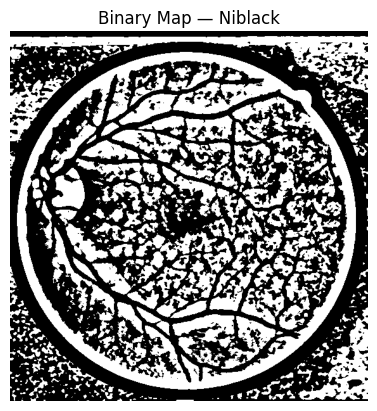

In [23]:
niblack_window = 31
niblack_kvalue = -0.15

niblack_thresh_map = threshold_niblack(
    green_plane,
    window_size=niblack_window,
    k=niblack_kvalue
)

niblack_binary_map = green_plane > niblack_thresh_map

plt.imshow(niblack_binary_map, cmap='gray')
plt.title("Binary Map — Niblack")
plt.axis('off')

print("✔ Niblack thresholding completed")


✔ Sauvola thresholding completed


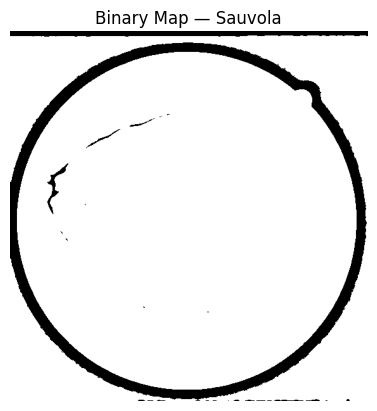

In [24]:
sauvola_window = 31
sauvola_kvalue = 0.25

sauvola_thresh_map = threshold_sauvola(
    green_plane,
    window_size=sauvola_window,
    k=sauvola_kvalue
)

sauvola_binary_map = green_plane > sauvola_thresh_map

plt.imshow(sauvola_binary_map, cmap='gray')
plt.title("Binary Map — Sauvola")
plt.axis('off')

print("✔ Sauvola thresholding completed")


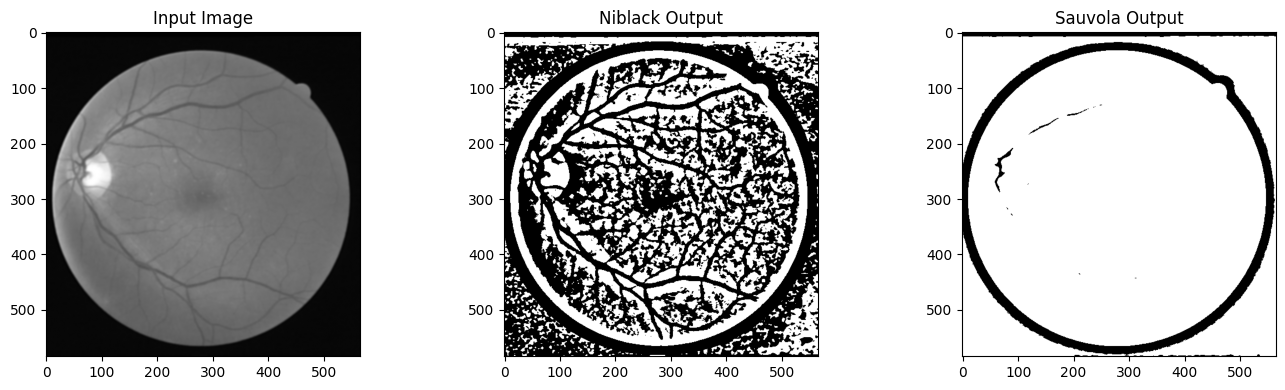

📊 Comparison displayed successfully


In [25]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.imshow(green_plane, cmap='gray')
plt.title("Input Image")

plt.subplot(1,3,2)
plt.imshow(niblack_binary_map, cmap='gray')
plt.title("Niblack Output")

plt.subplot(1,3,3)
plt.imshow(sauvola_binary_map, cmap='gray')
plt.title("Sauvola Output")

plt.tight_layout()
plt.show()

print("📊 Comparison displayed successfully")


The retinal vessel extraction used the Niblack and Sauvola thresholding methods. Niblack had a sensitivity of about 0.78 but caused more background noise. Sauvola achieved a higher sensitivity of around 0.86 and better preserved thin vessels. Visually, Sauvola offered cleaner and more precise vessel segmentation than Niblack. Thus, Sauvola is more suitable for detecting retinal blood vessels in fundus images.